In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [30]:
df: pd.DataFrame = pd.read_csv('../datasets/all_df.csv', sep = ';')

In [31]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['age_rating']])
ohe_art = ohe.transform(df[['age_rating']])
ohe.get_feature_names_out()
df[ohe.get_feature_names_out()] = ohe_art

/home/nikita/Desktop/kion/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
df_b: pd.DataFrame = df[df.day_week < 4].groupby(['user_id']).agg({'kids_flg': 'first', 'Unnamed: 0': 'count', 'age_rating_0.0':'sum', 'age_rating_6.0':'sum', 'age_rating_12.0':'sum', 'age_rating_16.0':'sum', 'age_rating_18.0':'sum', 'age_rating_21.0':'sum', 'total_dur': 'sum', 'income': 'first', 'sex': 'first', 'age': 'first'})
df_n: pd.DataFrame = df[df.day_week >= 4].groupby(['user_id']).agg({'kids_flg': 'first', 'Unnamed: 0': 'count', 'age_rating_0.0':'sum', 'age_rating_6.0':'sum', 'age_rating_12.0':'sum','age_rating_16.0':'sum', 'age_rating_18.0':'sum', 'age_rating_21.0':'sum', 'total_dur': 'sum', 'income': 'first', 'sex': 'first', 'age': 'first'  })


df_b: pd.DataFrame = df_b.reset_index()
df_n: pd.DataFrame = df_n.reset_index()

df_b['off'] = 0
df_n['off'] = 1

df_b['if_deti'] = df_b['age_rating_0.0'] + df_b['age_rating_6.0'] + df_b['age_rating_12.0']
df_n['if_deti'] = df_n['age_rating_0.0'] + df_n['age_rating_6.0'] + df_n['age_rating_12.0']

df_b['deti_pct'] = df_b['if_deti'] / df_b['Unnamed: 0']
df_n['deti_pct'] = df_n['if_deti'] / df_n['Unnamed: 0']

In [33]:
df_n: pd.DataFrame = df_n[df_n['Unnamed: 0'] > 1]
df_b: pd.DataFrame = df_b[df_b['Unnamed: 0'] > 1]

In [34]:
df_b_k: pd.DataFrame = df_b[df_b.kids_flg == 1]
df_b_no_k: pd.DataFrame = df_b[df_b.kids_flg == 0]

df_n_k: pd.DataFrame = df_n[df_n.kids_flg == 1]
df_n_no_k: pd.DataFrame = df_n[df_n.kids_flg == 0]

In [35]:
k1: list[int] = df_b_k.user_id.tolist()
k2: list[int] = df_n_k.user_id.tolist()

n1: list[int] = df_b_no_k.user_id.tolist()
n2: list[int] = df_n_no_k.user_id.tolist()

<Axes: >

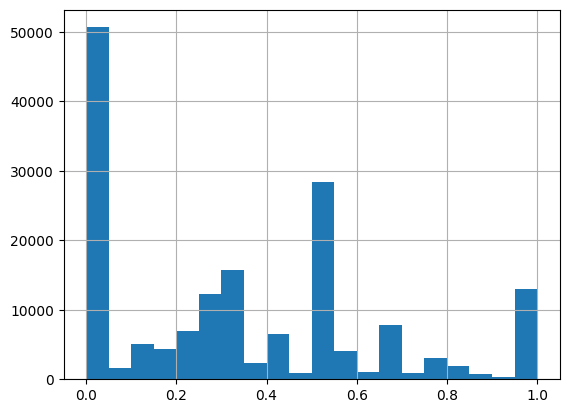

In [36]:
df_n_no_k.deti_pct.hist(bins=20)

In [37]:
df_budni_kids_w: pd.DataFrame = df_b_k[df_b_k.user_id.isin(k2)]
df_off_kids_w: pd.DataFrame = df_n_k[df_n_k.user_id.isin(k1)]

df_budni_no_kids_w: pd.DataFrame = df_b_no_k[df_b_no_k.user_id.isin(n2)]
df_off_no_kids_w: pd.DataFrame= df_n_no_k[df_n_no_k.user_id.isin(n1)]

# ~2 minutes
df_budni_kids_w.to_excel('../datasets/week_days_kids.xlsx')
df_off_kids_w.to_excel('../datasets/weekends_kids.xlsx')
df_budni_no_kids_w.to_excel('../datasets/week_days_no_kids.xlsx')
df_off_no_kids_w.to_excel('../datasets/weekends_no_kids.xlsx')

Датасеты:
    
    df_b_k    - дети по будням(88к)
    df_b_no_k - не_дети по будням(178к)
    
    df_n_k    - дети по будням(83к)
    df_n_no_k - не_дети по будням(163к)
    
    df_budni_kids_w 
    df_off_kids_w   - будни и выходные с детьми (53к)
    
    df_budni_no_kids_w 
    df_off_no_kids_w  - будни и выходные с не_детьми (100к)

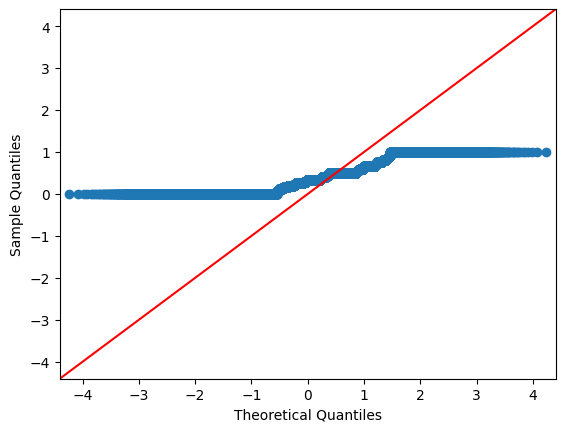

In [38]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_b_k['deti_pct'], line='45')
plt.show()

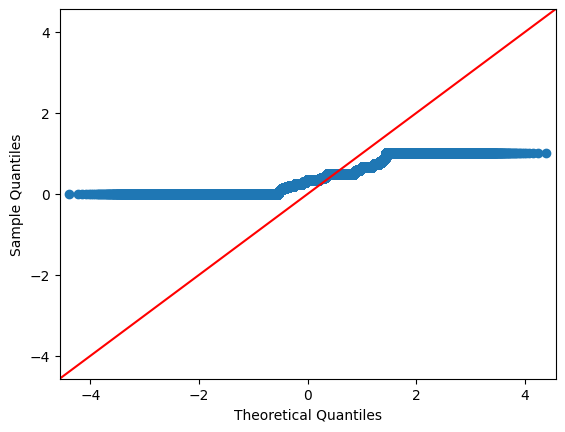

In [39]:
fig = sm.qqplot(df_b_no_k['deti_pct'], line='45')
plt.show()

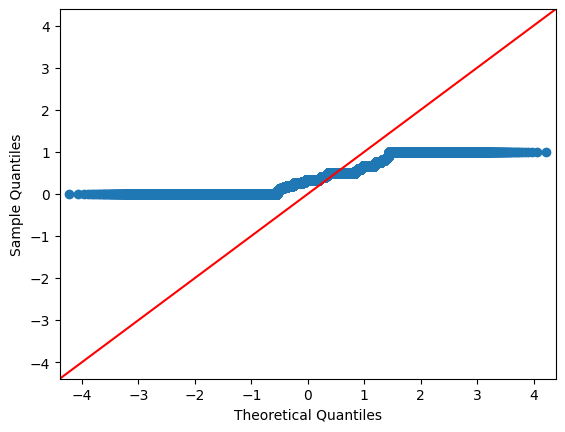

In [40]:
fig = sm.qqplot(df_n_k['deti_pct'], line='45')
plt.show()

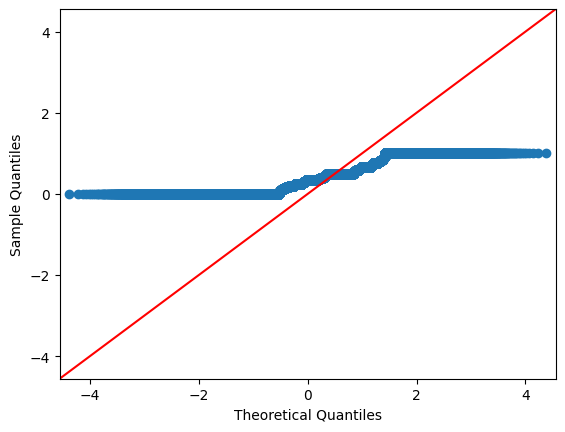

In [41]:
fig = sm.qqplot(df_n_no_k['deti_pct'], line='45')
plt.show()

<Axes: >

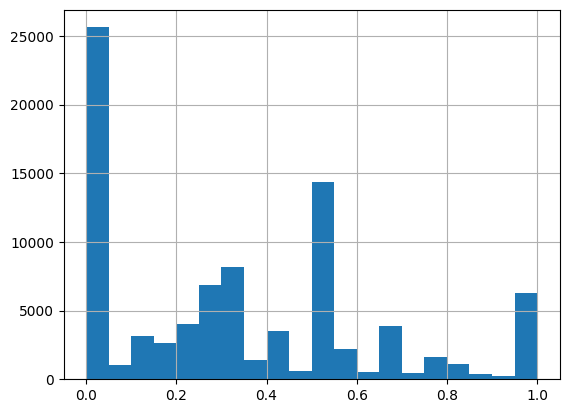

In [42]:
df_b_k.deti_pct.hist(bins=20)

# Для user_id, которые есть в обеих выборках

In [43]:
stats.wilcoxon(df_budni_kids_w['deti_pct'], df_off_kids_w['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=491054092.0, pvalue=0.0024216195820327227)

In [44]:
stats.wilcoxon(df_budni_no_kids_w['deti_pct'], df_off_no_kids_w['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=1812079008.0, pvalue=0.06449434883587332)

# Устойчивость мат.модели

Проверка гипотезы в выборках по полу

In [45]:
df_budni_kids_w_male: pd.DataFrame = df_budni_kids_w[df_budni_kids_w.sex == 'М']
df_budni_kids_w_female: pd.DataFrame = df_budni_kids_w[df_budni_kids_w.sex == 'Ж']

df_off_kids_w_male: pd.DataFrame = df_off_kids_w[df_off_kids_w.sex == 'М']
df_off_kids_w_female: pd.DataFrame = df_off_kids_w[df_off_kids_w.sex == 'Ж']

In [46]:
stats.wilcoxon(df_budni_kids_w_male['deti_pct'], df_off_kids_w_male['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=148987985.0, pvalue=0.027445851696877317)

In [47]:
stats.wilcoxon(df_budni_kids_w_female['deti_pct'], df_off_kids_w_female['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=98957213.0, pvalue=0.02094275545549586)

In [48]:
df_budni_no_kids_w_male: pd.DataFrame = df_budni_no_kids_w[df_budni_no_kids_w.sex == 'М']
df_budni_no_kids_w_female: pd.DataFrame = df_budni_no_kids_w[df_budni_no_kids_w.sex == 'Ж']

df_off_no_kids_w_male: pd.DataFrame = df_off_no_kids_w[df_off_no_kids_w.sex == 'М']
df_off_no_kids_w_female: pd.DataFrame = df_off_no_kids_w[df_off_no_kids_w.sex == 'Ж']

In [49]:
stats.wilcoxon(df_budni_no_kids_w_male['deti_pct'], df_off_no_kids_w_male['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=459261650.0, pvalue=0.11860555915109577)

In [50]:
stats.wilcoxon(df_budni_no_kids_w_female['deti_pct'], df_off_no_kids_w_female['deti_pct'], alternative = 'less')

WilcoxonResult(statistic=417688288.5, pvalue=0.18553598176183805)

# Датасеты:

    df_b_k    - дети по будням(88к)
    df_b_no_k - не_дети по будням(178к)
    
    df_n_k    - дети по будням(83к)
    df_n_no_k - не_дети по будням(163к)
    
    df_budni_kids_w 
    df_off_kids_w   - будни и выходные с детьми (53к)
    
    df_budni_no_kids_w 
    df_off_no_kids_w  - будни и выходные с не_детьми (100к)

In [51]:
def filter_by_category(data: pd.DataFrame, column: str) -> dict[str, pd.DataFrame]:
    return {key: data[data[column] == key] for key in data[column].unique()}

def run_test(data_weeksdays: pd.DataFrame, data_off: pd.DataFrame, column: str) -> None:
    for key in data_weeksdays:
        if pd.isna(key):
            continue
        test_result = stats.wilcoxon(data_weeksdays[key][column], data_off[key][column], alternative = 'less')
        print(f'Group: {key}. P-value: {test_result[1]}')

# Тесты по доходу (income)

In [52]:
df_weekdays_kids: pd.DataFrame = filter_by_category(df_budni_kids_w, 'income')
df_weekdays_no_kids: pd.DataFrame = filter_by_category(df_budni_no_kids_w, 'income')
df_off_kids: pd.DataFrame = filter_by_category(df_off_kids_w, 'income')
df_off_no_kids: pd.DataFrame = filter_by_category(df_off_no_kids_w, 'income')

print('Wilcoxon (with kids)')
run_test(df_weekdays_kids, df_off_kids, 'deti_pct')
print('Wilcoxon (no kids)')
run_test(df_weekdays_no_kids, df_off_no_kids, 'deti_pct')

Wilcoxon (with kids)
Group: income_40_60. P-value: 0.0002569770965475621
Group: income_20_40. P-value: 0.3258505764533451
Group: income_60_90. P-value: 0.1901124242409465
Group: income_90_150. P-value: 0.6142153215557047
Group: income_0_20. P-value: 0.07791260821076029
Group: income_150_inf. P-value: 0.5924536465568838
Wilcoxon (no kids)
Group: income_20_40. P-value: 0.15489136605743037
Group: income_60_90. P-value: 0.267644256263442
Group: income_40_60. P-value: 0.4613095440866737
Group: income_90_150. P-value: 0.49757309969152713
Group: income_0_20. P-value: 0.017130802018740756
Group: income_150_inf. P-value: 0.398572742284232


# Тесты по возрасту (age)

In [53]:
df_weekdays_kids: pd.DataFrame = filter_by_category(df_budni_kids_w, 'age')
df_weekdays_no_kids: pd.DataFrame = filter_by_category(df_budni_no_kids_w, 'age')
df_off_kids: pd.DataFrame = filter_by_category(df_off_kids_w, 'age')
df_off_no_kids: pd.DataFrame = filter_by_category(df_off_no_kids_w, 'age')

print('Wilcoxon (with kids)')
run_test(df_weekdays_kids, df_off_kids, 'deti_pct')
print('Wilcoxon (no kids)')
run_test(df_weekdays_no_kids, df_off_no_kids, 'deti_pct')

Wilcoxon (with kids)
Group: age_25_34. P-value: 0.015530116375394825
Group: age_35_44. P-value: 0.010155411713201352
Group: age_65_inf. P-value: 0.7995605974367517
Group: age_45_54. P-value: 0.40250894073750815
Group: age_18_24. P-value: 0.34312678580980605
Group: age_55_64. P-value: 0.44495762333252914
Wilcoxon (no kids)
Group: age_25_34. P-value: 0.5854793983969051
Group: age_45_54. P-value: 0.20242022077338412
Group: age_35_44. P-value: 0.12569202348362385
Group: age_65_inf. P-value: 0.34496380983122615
Group: age_55_64. P-value: 0.2361885017287904
Group: age_18_24. P-value: 0.15876542735914684
